In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [2]:
df = pd.read_csv(r'E:\Code_Vauld\IOT_GEN_PLOT2\1m8c8s8L_AutoMan_Anomaly\sensor_IOT_2.csv')
df.tail(5)

TS        xs1        xs2         xs3        xs4  \
6786  03/11/2022 02:12:21 PM  20.646673  60.595141  669.088290  92.799654   
6787  03/11/2022 02:12:22 PM  20.827228  66.530038  610.810208  91.463016   
6788  03/11/2022 02:12:23 PM  20.907723  62.439792  611.089013  92.783100   
6789  03/11/2022 02:12:24 PM  22.322878  61.270226  607.572160  91.063364   
6790  03/11/2022 02:12:25 PM  26.593615  60.883573  614.304469  93.421985   

             xs5         xs6         xs7        xs8  label  
6786  111.324267  336.702352  613.774809  91.882612      3  
6787  111.275100  347.527346  613.520770  92.463427      2  
6788  111.421581  350.276469  615.930634  91.956638      0  
6789  111.258126  339.267300  615.306716  90.568762      0  
6790  111.309720  332.661284  603.719522  92.872003      1

In [3]:
df  = df.drop(['TS'], axis=1)

In [4]:
df.dtypes

xs1      float64
xs2      float64
xs3      float64
xs4      float64
xs5      float64
xs6      float64
xs7      float64
xs8      float64
label      int64
dtype: object

In [5]:
df.shape

(6791, 9)

In [6]:
df.describe().transpose()

count        mean        std         min         25%         50%  \
xs1    6791.0   21.948156   1.477826   20.550162   21.083719   21.649190   
xs2    6791.0   61.901554   1.390847   60.550138   61.096423   61.626261   
xs3    6791.0  613.457411  12.227013  600.554729  606.049845  611.417164   
xs4    6791.0   92.381991   1.523822   90.550669   91.366379   92.159790   
xs5    6791.0  111.327639   1.176997  110.550097  110.815847  111.074290   
xs6    6791.0  341.845318   7.944622  330.550450  335.962863  341.071769   
xs7    6791.0  612.479548  10.936895  600.550275  605.772968  610.877617   
xs8    6791.0   92.365330   1.746000   90.551820   91.334785   92.099833   
label  6791.0    1.993815   2.566630    0.000000    0.000000    0.000000   

              75%         max  
xs1     22.196843   28.992140  
xs2     62.170007   69.000549  
xs3    616.637864  679.930096  
xs4     92.944105  100.052371  
xs5    111.342363  117.988638  
xs6    346.459287  378.713341  
xs7    616.260219  679.788751  
xs8     92.875664  101.959755  
label    4.000000    8.000000

In [7]:
df.skew().sort_values(ascending=False)

xs5      3.685838
xs8      2.944592
xs7      2.811619
xs2      2.654186
xs3      2.614998
xs1      2.542950
xs4      2.101595
xs6      1.364133
label    1.012329
dtype: float64

In [8]:
df.kurt().sort_values(ascending=False)

xs5      13.448586
xs7      10.427853
xs8      10.400956
xs3       8.020196
xs2       7.549788
xs1       6.629705
xs4       5.635838
xs6       3.231585
label    -0.339521
dtype: float64

In [9]:
df.columns

Index(['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8', 'label'], dtype='object')

for i in ['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8', 'label']:
    sns.displot(df[i], kde=True , rug=True)
    plt.show()
# No need to do log transform here as we dont need gaussian assumption for Decision Trees

for i in ['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8']:
    sns.boxplot(x='label',y=i,data=df)
    plt.show()

sns.jointplot(x='xs3',y='xs7',data=df,kind='reg')
# Discussed collinearity - it doesnt impact Decision tree model but be cautious while interpretation of the model

<AxesSubplot:xlabel='label', ylabel='count'>

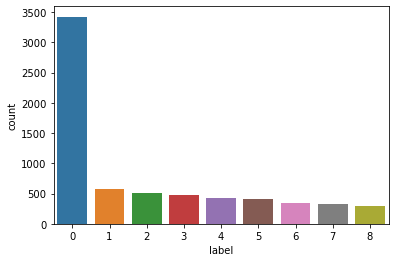

In [13]:
sns.countplot(x="label", data=df)

In [14]:
df.label.value_counts()

0    3423
1     577
2     512
3     471
4     425
5     404
6     348
7     330
8     301
Name: label, dtype: int64

# Handling Imbalance Data with IMBLEARN

In [15]:
X = df.drop('label',axis = 1)
Y = df['label']

In [16]:
print(X.shape,Y.shape)

(6791, 8) (6791,)


In [17]:
#pip install imblearn
# Install via for Anaconda Prompt run as Admin
# conda install -c conda-forge imbalanced-learn

In [18]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

In [19]:
#from imblearn.under_sampling import RandomUnderSampler

#nm = RandomUnderSampler(random_state=42)

In [20]:
X_res,y_res=nm.fit_sample(X,Y)
X_res.shape,y_res.shape

((2709, 8), (2709,))

In [21]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 3423, 1: 577, 2: 512, 3: 471, 4: 425, 5: 404, 6: 348, 7: 330, 8: 301})
Resampled dataset shape Counter({0: 301, 1: 301, 2: 301, 3: 301, 4: 301, 5: 301, 6: 301, 7: 301, 8: 301})


In [22]:
X_res.tail()

xs1        xs2         xs3        xs4         xs5         xs6  \
2704  22.240476  61.659117  607.552183  92.524607  111.426236  345.072072   
2705  21.145048  60.815807  609.112328  92.730550  110.890506  333.828689   
2706  22.119997  61.219455  611.789192  92.914829  110.722583  337.433263   
2707  21.387612  60.592737  617.239786  90.776931  110.584141  343.968716   
2708  22.132801  62.124358  619.401690  92.624537  110.579643  342.955992   

             xs7        xs8  
2704  602.634289  99.585523  
2705  617.583368  97.612314  
2706  601.206733  98.563026  
2707  618.871232  97.126437  
2708  615.110540  97.744608

In [23]:
y_res.tail()

2704    8
2705    8
2706    8
2707    8
2708    8
Name: label, dtype: int64

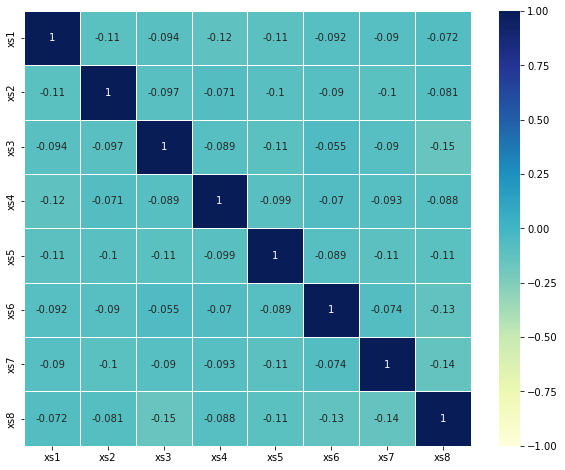

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(X_res.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True,
            cmap="YlGnBu",
            vmin=-1,
            vmax=+1)
plt.show()

In [25]:
X_res.columns

Index(['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8'], dtype='object')

In [26]:
df3 = X_res.join(y_res)

In [27]:
df3.tail()

xs1        xs2         xs3        xs4         xs5         xs6  \
2704  22.240476  61.659117  607.552183  92.524607  111.426236  345.072072   
2705  21.145048  60.815807  609.112328  92.730550  110.890506  333.828689   
2706  22.119997  61.219455  611.789192  92.914829  110.722583  337.433263   
2707  21.387612  60.592737  617.239786  90.776931  110.584141  343.968716   
2708  22.132801  62.124358  619.401690  92.624537  110.579643  342.955992   

             xs7        xs8  label  
2704  602.634289  99.585523      8  
2705  617.583368  97.612314      8  
2706  601.206733  98.563026      8  
2707  618.871232  97.126437      8  
2708  615.110540  97.744608      8

In [28]:
df3 = df3.sample(frac = 1).reset_index(drop=True)

In [29]:
df3.tail()

xs1        xs2         xs3        xs4         xs5         xs6  \
2704  21.411952  64.998495  615.795017  91.750992  111.393957  342.222614   
2705  22.073345  60.752608  609.303395  93.028633  111.316132  347.220380   
2706  21.854038  60.853387  639.748339  92.155628  110.727114  336.692986   
2707  22.268430  62.405553  619.409957  91.838032  111.155451  338.257298   
2708  21.525049  61.676463  657.561426  92.130455  111.062886  332.524949   

             xs7        xs8  label  
2704  614.637970  92.300726      2  
2705  660.835580  91.552866      7  
2706  602.924419  92.027649      3  
2707  619.181180  97.831242      8  
2708  600.942918  92.975438      3

In [30]:
df3.to_csv(r'C:\Users\Ganga Babu.M\Anomaly_Classifier_Model\shuffled.csv')

# Use pair plots on only variables with interesting correlations only
sns.pairplot(df3,hue='label',diag_kind ='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4,vars = ['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8'])
plt.show()

# Another way of visualizing pair plots for reference
grid = sns.PairGrid(data= df3,
                    vars = ['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8'], height = 4)
grid = grid.map_upper(sns.scatterplot)
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot)

In [32]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(df3.drop(['label'],axis=1), df3['label'], test_size=.3,
                                                   random_state=22)
X_train.shape,X_test.shape

((1896, 8), (813, 8))

# Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [33]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 3 and size of the leaf node to 5 (no particular reason for 
# selecting this)
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [34]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Print the accuracy of the model & print the confusion matrix

In [35]:
model_entropy.score(X_train, y_train)  
# performance on train data
# If allow data set go to leaves then accuracy always go to 1, if change min leaf nodes then also behave similar to pruning;

1.0

In [36]:
acc = model_entropy.score(X_test, y_test) 
# performance on test data
acc

0.997539975399754

Ref if required: Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

https://github.com/GreatLearningAIML1/chennai-oct-19-GangababuGB/blob/master/EnsembleTechnique/Session10_CaseStudyEnsemble_Sahil.ipynb

There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting.

Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy


In [ ]:
#Model has been overfitted and perfomring poor on test data, try standardization.

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_fs = sc.fit_transform(X_train)
X_test_fs = sc.transform(X_test)

model_entropy.fit(X_train_fs, y_train)

model_entropy.score(X_train_fs, y_train)

acc = model_entropy.score(X_test_fs, y_test) 
# performance on test data
acc

In [42]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=8, min_samples_leaf=12)
clf_pruned.fit(X_train, y_train)
# Regularize or prune, max step to 3, min smaples leaf -> less than 5 data pts not split;

DecisionTreeClassifier(max_depth=8, min_samples_leaf=12, random_state=100)

# Visualizing the tree

You might need to install pydotplus and graphviz packages for visualising the tree.

In [ ]:
#pip install six

In [43]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [44]:
xvar = df3.drop(['label'], axis=1)
feature_cols = xvar.columns
feature_cols

Index(['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8'], dtype='object')

In [45]:
y_test.value_counts()

6    102
2     98
0     97
5     93
8     88
1     85
3     85
4     83
7     82
Name: label, dtype: int64

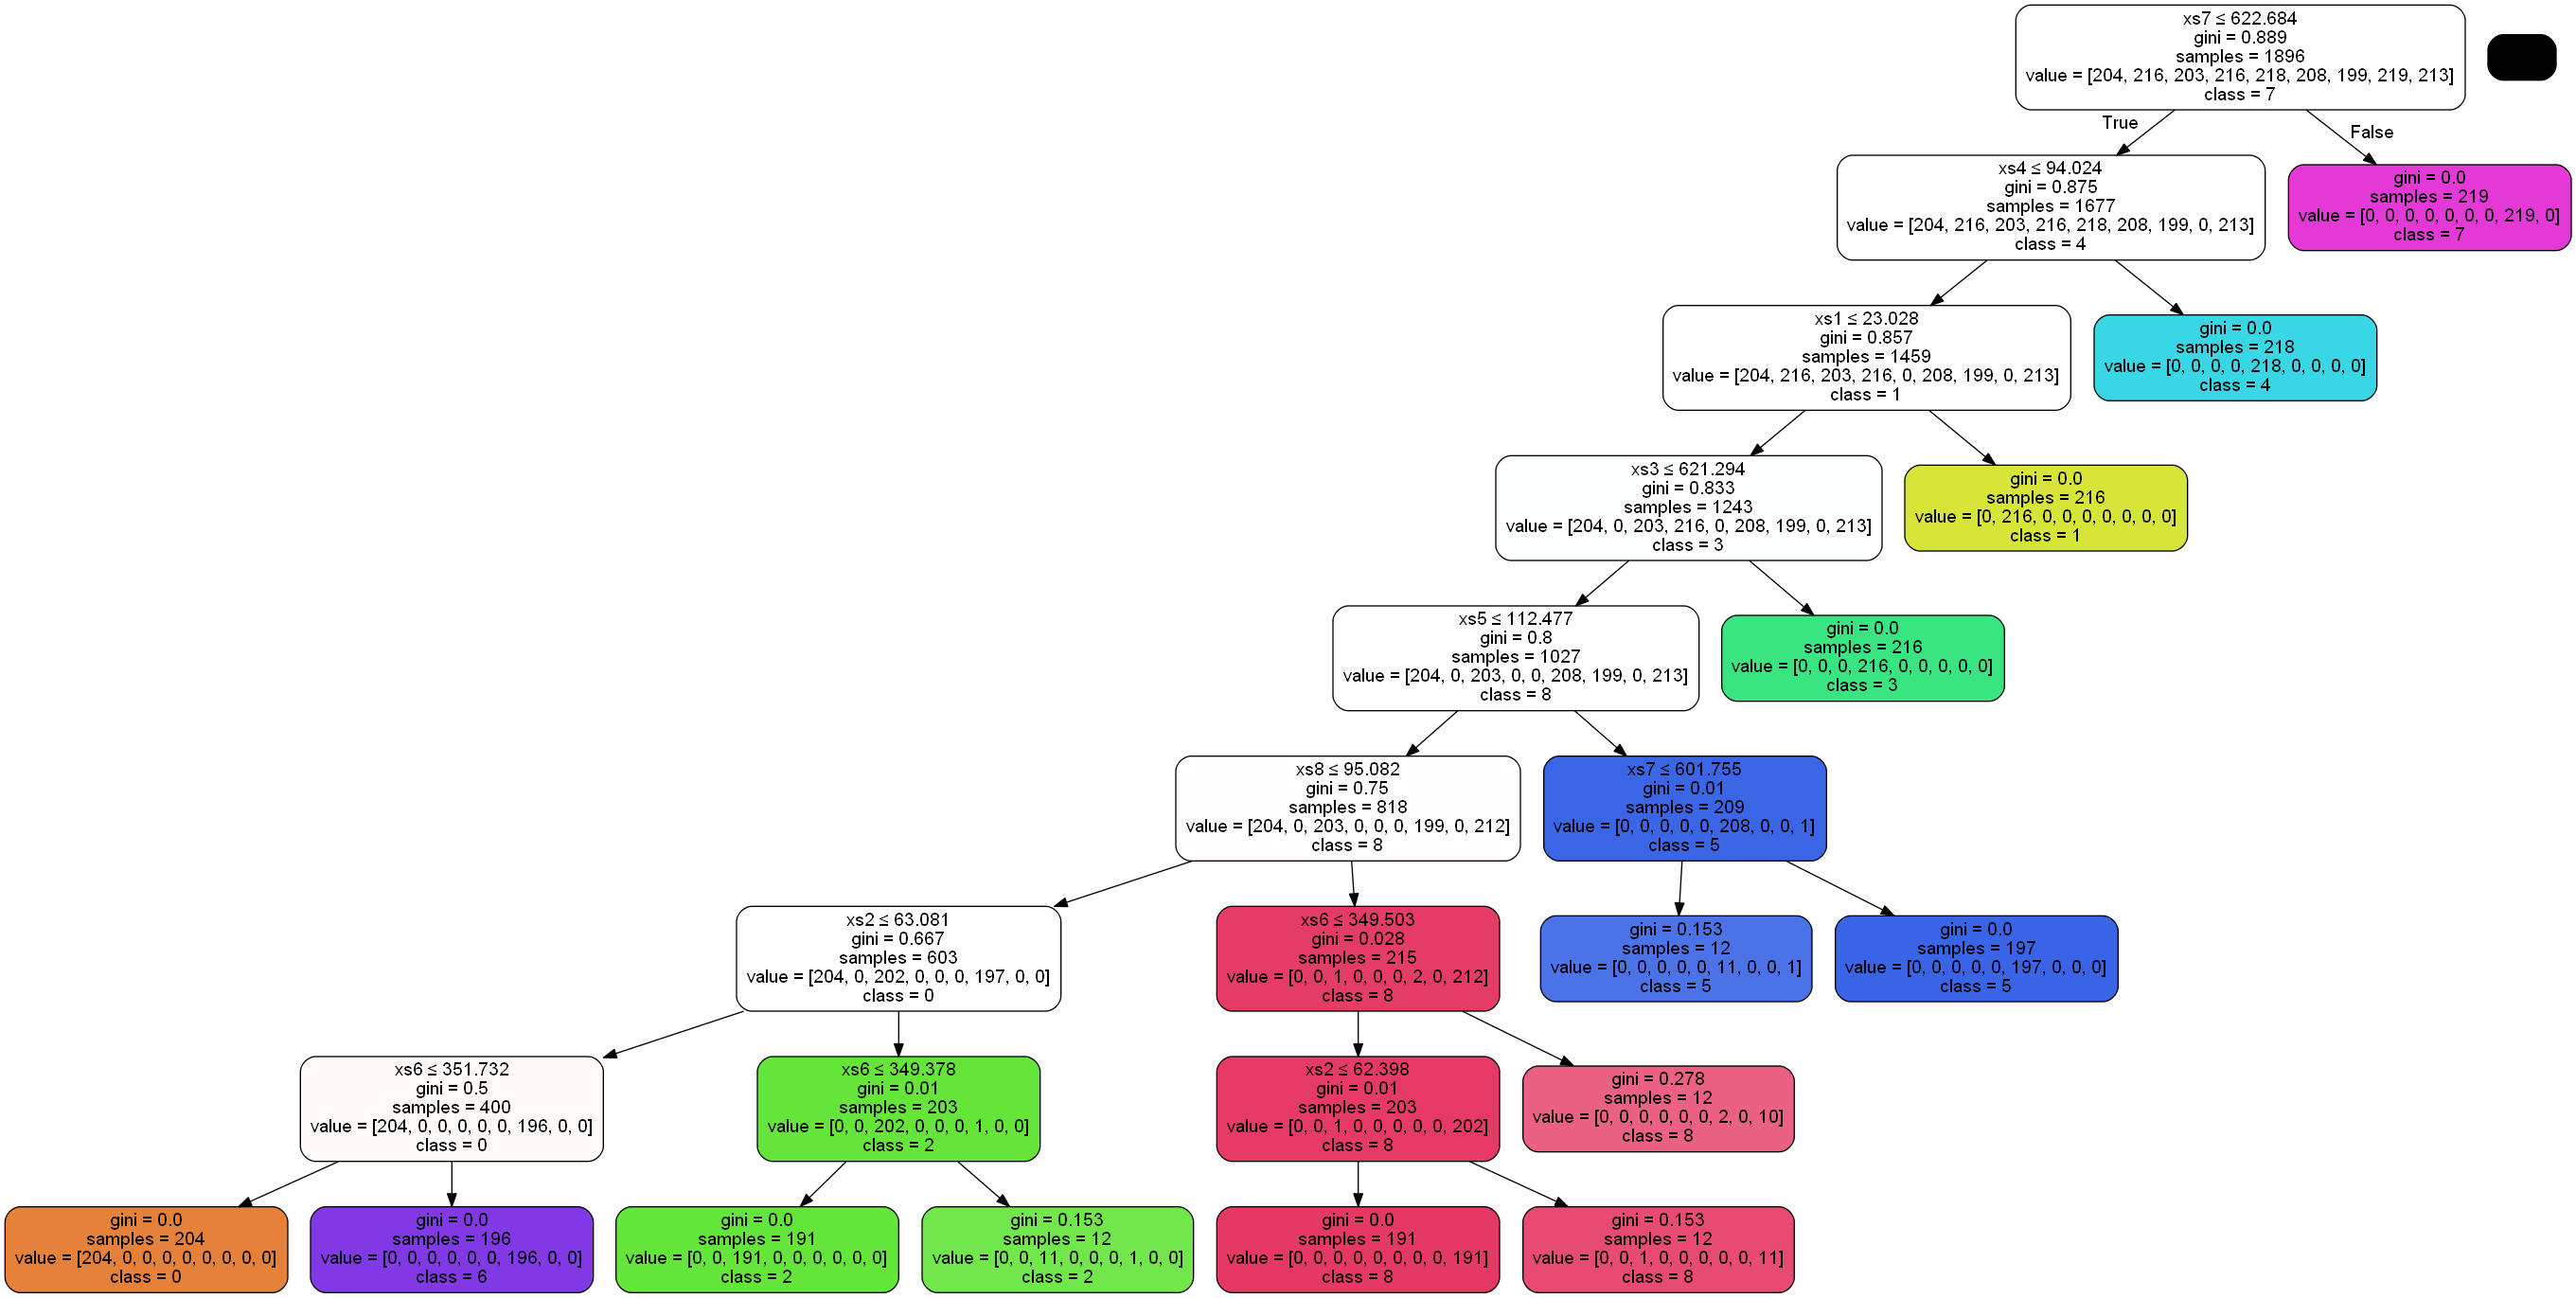

In [46]:
#Print the pruned tree
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Anomaly_pruned.png')
Image(graph.create_png())

In [47]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [48]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))
# Pruning helped as test / training but perhaps getting to more underfitting now - cautious about it.

0.995079950799508
0.9973628691983122


In [49]:
acc_DT = accuracy_score(y_test, preds_pruned)
acc_DT

0.995079950799508

In [50]:
#Grid Search - To find the best parameters for Pruned Decision Tree
#X_train, X_test, y_train, y_test

from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state = 100)
grid_values = {'criterion' : ['gini', 'entropy'],
               'splitter' : ['best', 'random'],
               'max_depth' : np.arange(8,12),
               'min_samples_leaf' : np.arange(10,15)
              }
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)
# New Model Evaluation metrics 
print('Evaluation Score : ' + str(grid_clf_acc.score(X_test,y_test)))
print('Best Parameters : ' + str(grid_clf_acc.best_params_))

acc_GS = grid_clf_acc.score(X_test,y_test)

Evaluation Score : 0.995079950799508
Best Parameters : {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10, 'splitter': 'best'}


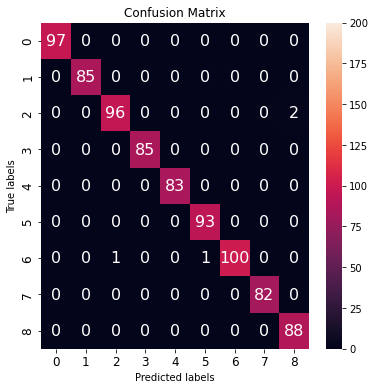

In [51]:
#Decision Tree (Grid Search) Confusion matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_acc),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [52]:
y_test.value_counts()

6    102
2     98
0     97
5     93
8     88
1     85
3     85
4     83
7     82
Name: label, dtype: int64

In [53]:
# Another way to look at the precision - recall scores
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test,y_pred_acc,target_names=levels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        97
           0       1.00      1.00      1.00        85
           3       0.99      0.98      0.98        98
           6       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        83
           7       0.99      1.00      0.99        93
           4       1.00      0.98      0.99       102
           8       1.00      1.00      1.00        82
           2       0.98      1.00      0.99        88

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [54]:
## Calculating feature importance used for interpretation
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
xs7  0.130109
xs4  0.129323
xs1  0.128092
xs3  0.127770
xs5  0.122956
xs8  0.122593
xs6  0.119723
xs2  0.119434

In [55]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree','Pruned Decision Tree','Grid Search Decision Tree'], 'accuracy': [acc,acc_DT,acc_GS]})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree   0.99754
1       Pruned Decision Tree   0.99508
2  Grid Search Decision Tree   0.99508

In [56]:
# You can run the model on the new data coming in every day
test = df3.sample(n = 10,replace=True,random_state=100).drop(['label'],axis=1)
test.reset_index(inplace=True,drop=True)

In [57]:
# Make predictions based on your final mode 
predictions = grid_clf_acc.predict(test)
pd.DataFrame(predictions)

0
0  5
1  7
2  6
3  4
4  5
5  7
6  6
7  4
8  8
9  8

In [58]:
pd.concat([test,pd.DataFrame(predictions)], axis=1, join='inner')

xs1        xs2         xs3        xs4         xs5         xs6  \
0  21.336427  62.522376  604.705299  91.885196  114.626179  342.268169   
1  21.714707  60.791940  604.597174  93.049470  111.165982  349.122862   
2  22.147970  60.683108  610.970566  92.424276  110.647009  359.854269   
3  21.010677  62.085008  619.899732  95.425762  111.311207  331.278691   
4  22.504322  62.093752  609.349808  92.786744  116.308571  334.318218   
5  21.638937  61.650982  615.676465  91.136797  110.553420  343.430759   
6  21.631839  60.969985  614.254663  92.364778  111.525349  356.680874   
7  22.422593  60.938214  602.014788  97.707388  111.455078  344.523902   
8  20.913783  62.189341  618.954152  92.537351  110.906148  346.729404   
9  20.765235  61.139391  611.598663  92.261705  111.500596  341.564894   

          xs7         xs8  0  
0  620.108170   92.932299  5  
1  657.481897   93.320146  7  
2  607.375251   91.144968  6  
3  607.257578   91.942234  4  
4  609.529003   93.117179  5  
5  637.083961   91.655097  7  
6  607.592477   92.815159  6  
7  605.677650   93.185863  4  
8  607.079185   98.468011  8  
9  615.417711  100.034873  8

# References -

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://www.tutorialspoint.com/scikit_learn/scikit_learn_decision_trees.htm

https://scikit-learn.org/stable/modules/tree.html

https://towardsdatascience.com/stop-saying-precision-and-recall-to-business-leaders-f17082ab5052

# Apply the Random forest model and print the accuracy of Random forest Model

In [59]:
# Initiate Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,oob_score=True,random_state=22)
rfcl = rfcl.fit(X_train, y_train)

In [60]:
# Make predictions and calculate accuracy
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
acc_RF

0.997539975399754

In [61]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree   0.99754
1       Pruned Decision Tree   0.99508
2  Grid Search Decision Tree   0.99508
0              Random Forest   0.99754

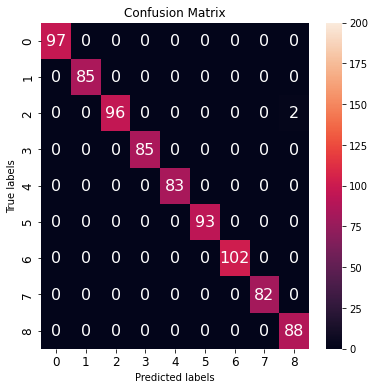

In [62]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_RF),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [63]:
## Classification Report
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test, pred_RF,target_names=levels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        97
           0       1.00      1.00      1.00        85
           3       1.00      0.98      0.99        98
           6       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        93
           4       1.00      1.00      1.00       102
           8       1.00      1.00      1.00        82
           2       0.98      1.00      0.99        88

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [64]:
# Binarize y test(5,6,7) classes to (1,0,0) - (0,0,1) classes to generate AUC ROC Curves 
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])
n_classes = y_test_bin.shape[1]

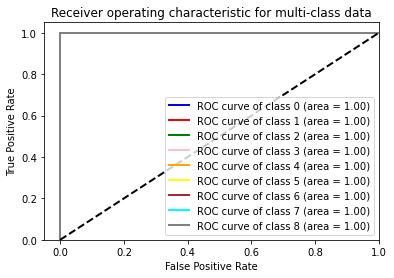

In [65]:
#Generate AUC ROC Curves

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc


# classifier
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 50,random_state=22))
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green','pink','orange','yellow','brown','aqua','grey']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [66]:
# Visualize Random Forest Trees
trees = rfcl.estimators_
display(trees)

[DecisionTreeClassifier(max_features='auto', random_state=895331189),
 DecisionTreeClassifier(max_features='auto', random_state=867424388),
 DecisionTreeClassifier(max_features='auto', random_state=2068804396),
 DecisionTreeClassifier(max_features='auto', random_state=990018496),
 DecisionTreeClassifier(max_features='auto', random_state=1806197092),
 DecisionTreeClassifier(max_features='auto', random_state=590468454),
 DecisionTreeClassifier(max_features='auto', random_state=1542674934),
 DecisionTreeClassifier(max_features='auto', random_state=1202737643),
 DecisionTreeClassifier(max_features='auto', random_state=735133268),
 DecisionTreeClassifier(max_features='auto', random_state=1489103752),
 DecisionTreeClassifier(max_features='auto', random_state=1455409631),
 DecisionTreeClassifier(max_features='auto', random_state=1689254372),
 DecisionTreeClassifier(max_features='auto', random_state=1161929693),
 DecisionTreeClassifier(max_features='auto', random_state=1007761042),
 DecisionTr

In [67]:
print("Number of trees is ",len(trees))

Number of trees is  50


In [68]:
print("Number of nodes per tree is ")

i = 0
for tree_in_forest in trees:
    print(tree_in_forest.tree_.node_count)
    i = i + 1

Number of nodes per tree is 
67
29
119
47
127
77
23
141
61
87
25
79
89
83
37
87
49
115
83
73
131
147
95
27
63
87
75
155
157
119
49
67
109
97
107
99
101
79
111
153
109
39
61
41
85
73
83
89
141
59


In [69]:
tree_in_forest = trees[1]

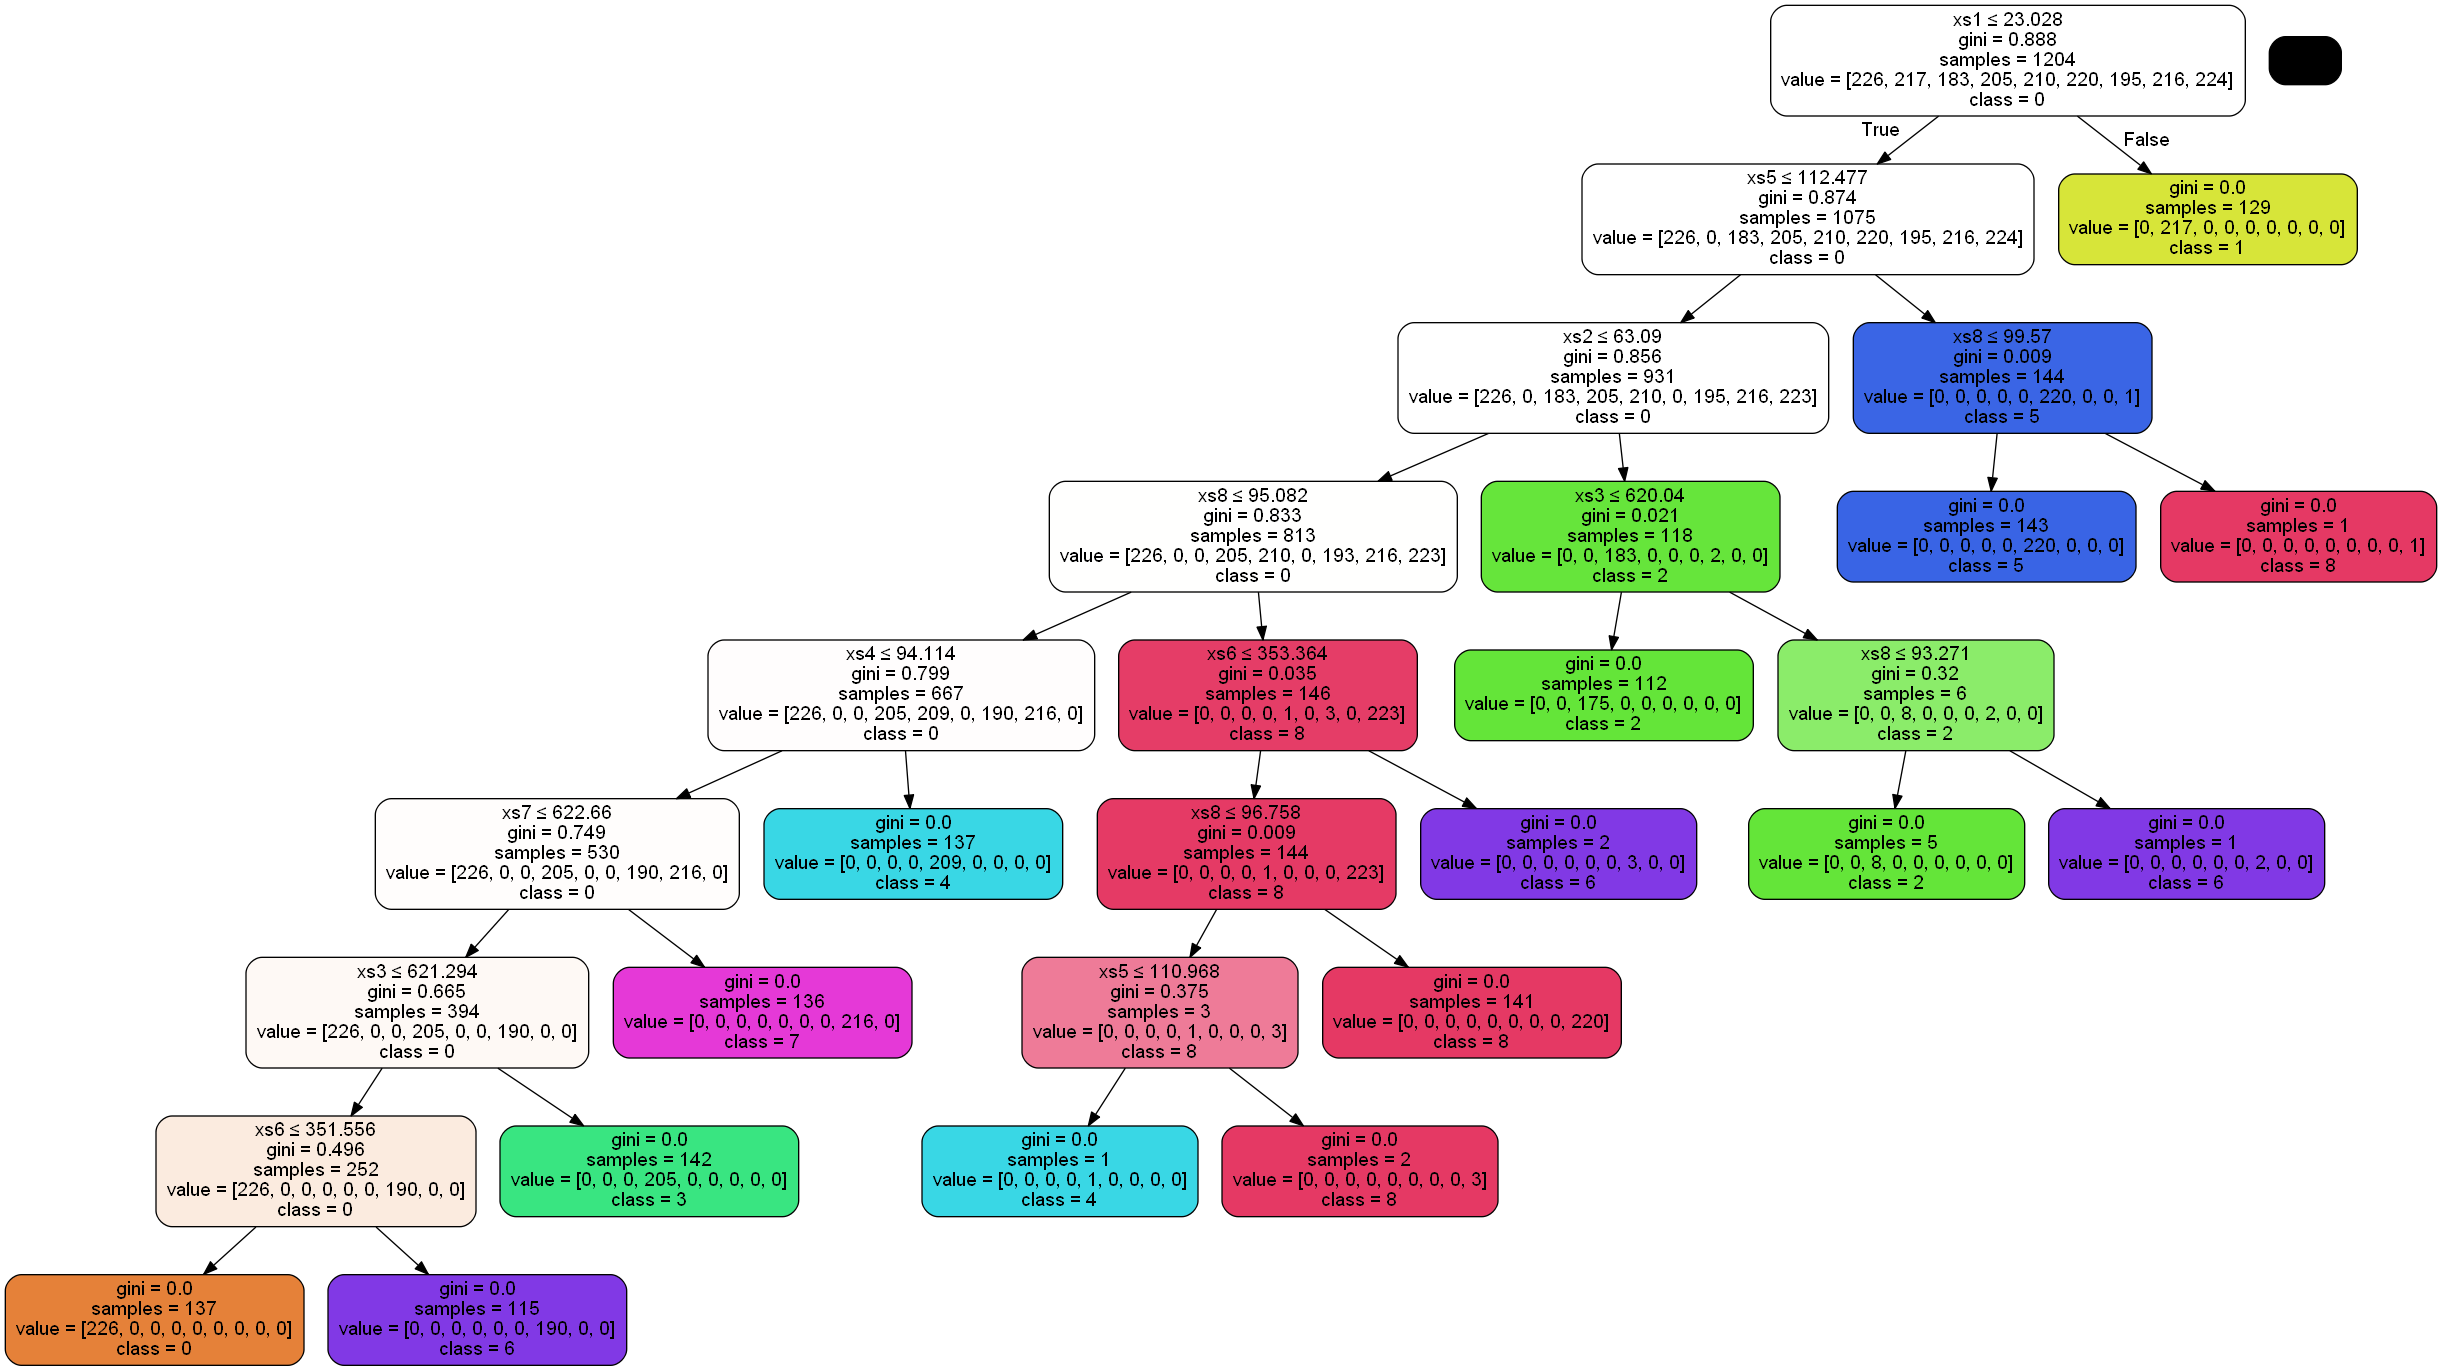

In [70]:
# Plot tree using dot function as before
dot_data = StringIO()
export_graphviz(tree_in_forest, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Anomaly_pruned.png')
Image(graph.create_png())

# Apply Bagging Classifier Algorithm and print the accuracy.

In [71]:
# Initiate Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

# Use different base classifiers; Ex, base_estimator = KNeighborsClassifier()

In [72]:
# Make predictions and calculate accuracy
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
acc_BG

0.997539975399754

In [73]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree   0.99754
1       Pruned Decision Tree   0.99508
2  Grid Search Decision Tree   0.99508
0              Random Forest   0.99754
0                    Bagging   0.99754

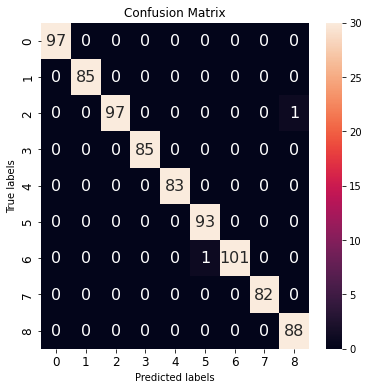

In [74]:
## Confusion Matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_BG),annot=True,vmin=0,vmax=30,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [75]:
## Classification Report
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test, pred_BG,target_names=levels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        97
           0       1.00      1.00      1.00        85
           3       1.00      0.99      0.99        98
           6       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        83
           7       0.99      1.00      0.99        93
           4       1.00      0.99      1.00       102
           8       1.00      1.00      1.00        82
           2       0.99      1.00      0.99        88

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



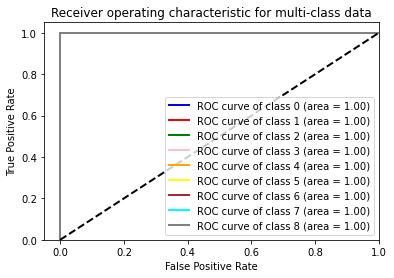

In [76]:
## AUC ROC Curve
# classifier
clf = OneVsRestClassifier(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [77]:
# Initiate adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [78]:
# Make predictions and calculate accuracy
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [79]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree   0.99754
1       Pruned Decision Tree   0.99508
2  Grid Search Decision Tree   0.99508
0              Random Forest   0.99754
0                    Bagging   0.99754
0                   Adaboost   0.99877

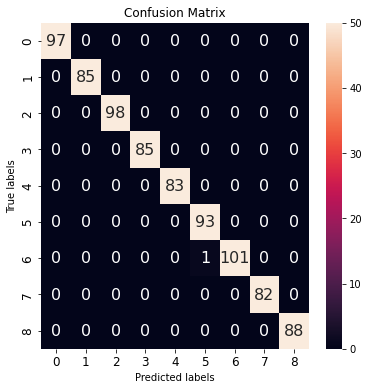

In [80]:
## Confusion Matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_AB),annot=True,vmin=0,vmax=50,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [81]:
## Classification Report
y,levels = pd.factorize(df['label'].astype(str))
print(metrics.classification_report(y_test, pred_AB,target_names=levels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           6       1.00      1.00      1.00        85
           8       1.00      1.00      1.00        98
           2       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        83
           1       0.99      1.00      0.99        93
           3       1.00      0.99      1.00       102
           7       1.00      1.00      1.00        82
           5       1.00      1.00      1.00        88

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



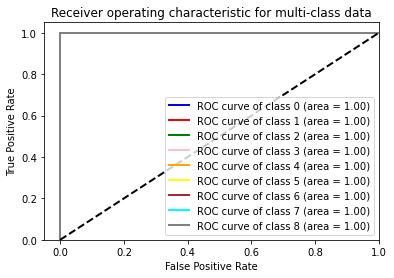

In [82]:
## AUC ROC Curve
# classifier
clf = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [83]:
# Visualize Adaboost Trees
trees_ab = abcl.estimators_
display(trees_ab)

[DecisionTreeClassifier(max_depth=1, random_state=895331189),
 DecisionTreeClassifier(max_depth=1, random_state=867424388),
 DecisionTreeClassifier(max_depth=1, random_state=2068804396),
 DecisionTreeClassifier(max_depth=1, random_state=990018496),
 DecisionTreeClassifier(max_depth=1, random_state=1806197092),
 DecisionTreeClassifier(max_depth=1, random_state=590468454),
 DecisionTreeClassifier(max_depth=1, random_state=1542674934),
 DecisionTreeClassifier(max_depth=1, random_state=1202737643),
 DecisionTreeClassifier(max_depth=1, random_state=735133268),
 DecisionTreeClassifier(max_depth=1, random_state=1489103752),
 DecisionTreeClassifier(max_depth=1, random_state=1455409631),
 DecisionTreeClassifier(max_depth=1, random_state=1689254372),
 DecisionTreeClassifier(max_depth=1, random_state=1161929693),
 DecisionTreeClassifier(max_depth=1, random_state=1007761042),
 DecisionTreeClassifier(max_depth=1, random_state=820516366),
 DecisionTreeClassifier(max_depth=1, random_state=48947964),


In [84]:
print("Number of trees is ",len(trees_ab))

Number of trees is  100


In [86]:
print("Number of nodes per tree is ")

i = 0
for tree_in_forest in trees_ab:
    print(tree_in_forest.tree_.node_count)
    i = i + 1

Number of nodes per tree is 
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [87]:
tree_in_forest_ab = trees_ab[1]

In [88]:
tree_in_forest_ab

DecisionTreeClassifier(max_depth=1, random_state=867424388)

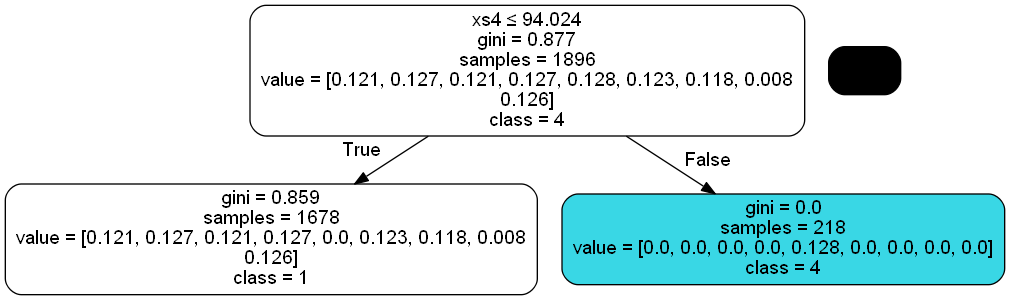

In [89]:
# Plot tree using dot function as before
dot_data = StringIO()
export_graphviz(tree_in_forest_ab, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('anomaly_pruned.png')
Image(graph.create_png())

In [90]:
# Initiate Gradiant Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [91]:
# Make predictions and calculate accuracy on test data set
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [92]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree   0.99754
1       Pruned Decision Tree   0.99508
2  Grid Search Decision Tree   0.99508
0              Random Forest   0.99754
0                    Bagging   0.99754
0                   Adaboost   0.99877
0             Gradient Boost   1.00000

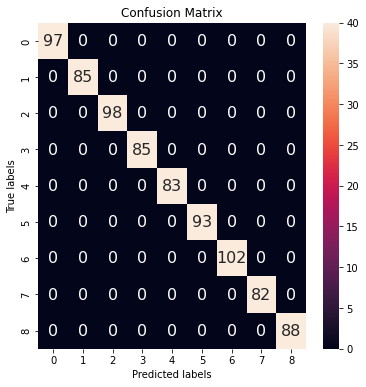

In [93]:
## Confusion Matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_GB),annot=True,vmin=0,vmax=40,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


In [94]:
## Classification Report
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test, pred_GB,target_names=levels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        97
           0       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        98
           6       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        93
           4       1.00      1.00      1.00       102
           8       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        88

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



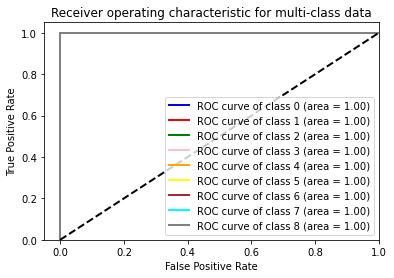

In [95]:
## AUC ROC Curve
clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Helpful Links

Helpful Links
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# # Stacking

In [96]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [97]:
# Create Base Learners for Stacking that is Random Forest and GBM
base_learners = [
                 ('model_1', RandomForestClassifier(n_estimators = 50,random_state=22)),
                 ('model_2', GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1,random_state=22))             
                ]

In [98]:
# Initialize Stacking Classifier with the Meta Learner
clf_stack = StackingClassifier(estimators=base_learners, final_estimator=GradientBoostingClassifier(random_state=22))

In [99]:
# Extract score
clf_stack.fit(X_train, y_train)

StackingClassifier(estimators=[('model_1',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=22)),
                               ('model_2',
                                GradientBoostingClassifier(n_estimators=50,
                                                           random_state=22))],
                   final_estimator=GradientBoostingClassifier(random_state=22))

In [100]:
# Making predictions using Staking models
pred_stack = clf_stack.predict(X_test)

In [101]:
# Calculating accuracy on test data set
acc_stack = clf_stack.score(X_test, y_test)

In [102]:
tempResultsDf = pd.DataFrame({'Method':['Stacking RF&GB'], 'accuracy': [acc_stack]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree   0.99754
1       Pruned Decision Tree   0.99508
2  Grid Search Decision Tree   0.99508
0              Random Forest   0.99754
0                    Bagging   0.99754
0                   Adaboost   0.99877
0             Gradient Boost   1.00000
0             Stacking RF&GB   1.00000

<AxesSubplot:>

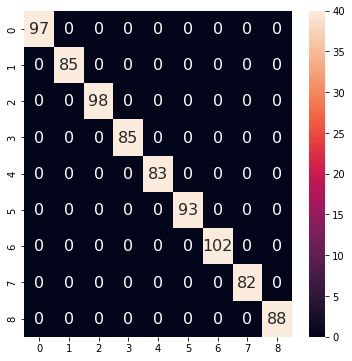

In [103]:
## Confusion Matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_stack),annot=True,vmin=0,vmax=40,fmt='g', ax = ax,annot_kws={"size": 16})

In [104]:
## Classification Report
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test, pred_stack,target_names=levels))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        97
           0       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        98
           6       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        93
           4       1.00      1.00      1.00       102
           8       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        88

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



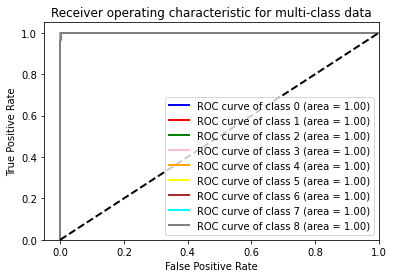

In [105]:
# AUC ROC Curves
# classifier
clf = OneVsRestClassifier(StackingClassifier(estimators=base_learners, final_estimator=GradientBoostingClassifier(random_state=22)))
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# GridSearchCV

In [106]:
# Improving best model using GridSearch CV based on Random Forest from all the models run above
from sklearn.model_selection import GridSearchCV

clf_RF = RandomForestClassifier(random_state=22)
grid_values = {'n_estimators':[50,100,150],
               'max_features':['auto','sqrt','log2']
              }
grid_clf_acc_RF = GridSearchCV(clf_RF, param_grid = grid_values)
grid_clf_acc_RF.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc_RF = grid_clf_acc_RF.predict(X_test)
# New Model Evaluation metrics 
print('Evaluation Score : ' + str(grid_clf_acc_RF.score(X_test,y_test)))
print('Best Parameters : ' + str(grid_clf_acc_RF.best_params_))

acc_GS_RF = grid_clf_acc_RF.score(X_test,y_test)
acc_GS_RF

Evaluation Score : 0.998769987699877
Best Parameters : {'max_features': 'auto', 'n_estimators': 150}


0.998769987699877

In [107]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest with Grid Search'], 'accuracy': [acc_GS_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0                   Decision Tree   0.99754
1            Pruned Decision Tree   0.99508
2       Grid Search Decision Tree   0.99508
0                   Random Forest   0.99754
0                         Bagging   0.99754
0                        Adaboost   0.99877
0                  Gradient Boost   1.00000
0                  Stacking RF&GB   1.00000
0  Random Forest with Grid Search   0.99877

In [108]:
# Feature Importance
feat_importance = rfcl.feature_importances_
feat_imp_dict = dict(zip(feature_cols, rfcl.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
xs8  0.149529
xs4  0.126821
xs1  0.124994
xs7  0.124864
xs3  0.120585
xs6  0.119400
xs2  0.118432
xs5  0.115374

# Model Interpretation using Lime

In [109]:
import lime
import lime.lime_tabular

In [110]:
df3.drop('label',axis=1).columns

Index(['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8'], dtype='object')

In [111]:
# Using Grid Search algo for model interpretation as it turned out to be best algorithm
# clf_stack
# grid_clf_acc_RF
predict_fn_rf = lambda x: grid_clf_acc_RF.predict_proba(x).astype(float)
X = X_train.values

In [112]:
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = df3.drop('label',axis=1).columns,
                                                   class_names=['0','1','2','3','4','5','6','7','8'],kernel_width=5)

In [113]:
X_test.iloc[105]

xs1     21.430257
xs2     61.632417
xs3    652.318601
xs4     93.522355
xs5    111.418416
xs6    335.787811
xs7    610.102912
xs8     90.880000
Name: 1986, dtype: float64

In [ ]:
#22.134947	60.786604	609.142675	92.696432	111.526181	336.322046	603.92307	92.107053	2

In [114]:
y_test.values[105]

3

In [115]:
# Explain which features are leading to which class prediction
choosen_instance = X_test.values[105]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=8,labels=[0,1,2,3,4,5,6,7,8])
exp.show_in_notebook(show_all=True)

In [116]:
y_test.values[110]

1

In [117]:
choosen_instance = X_test.values[110]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10,labels=[0,1,2,3,4,5,6,7,8])
exp.show_in_notebook(show_all=False)

In [118]:
y_test.values[14]

1

In [119]:
choosen_instance = X_test.values[14]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=8,labels=[0,1,2,3,4,5,6,7,8])
exp.show_in_notebook(show_all=True)

ValueError: DataFrame constructor not properly called!

In [131]:
pd.concat([X,pd.DataFrame(predict_fn_rf)], axis=1, join='inner')

ValueError: DataFrame constructor not properly called!

In [136]:
X_test.values[812]

array([ 22.306493,  61.52547 , 609.674267,  92.33977 , 110.722271,
       348.262294, 614.999633,  98.509245])

In [135]:
choosen_instance = X_test.values[812]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=8,labels=[0,1,2,3,4,5,6,7,8])
exp.show_in_notebook(show_all=True)

In [133]:
len(X_test)

813

Lime Explaination
https://arxiv.org/pdf/1602.04938.pdf